In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [3]:
df= pd.read_csv('innovize_final_ml_dataset.csv')

In [4]:
df.head(10)

,phy_fitness,diet_pref,act_level,sleep_hrs,mindfulness,career,gender,daily_avg_steps,daily_avg_calories,is_healthy
0,3.0,Vegan,Sedentary,7,10,Artist,1.0,2020.0,1831.0,0
1,4.0,Vegan,Lightly Active,7,1,Teacher,0.0,5154.0,2190.0,0
2,8.0,Vegetarian,Active,8,10,Freelancer,1.0,12363.0,2297.0,1
3,2.0,Pescatarian,Sedentary,8,7,Doctor,0.0,1664.0,1943.0,0
4,9.0,Pescatarian,Highly Active,5,7,Business,0.0,17680.0,3527.0,1
5,2.0,Keto,Sedentary,8,9,Freelancer,1.0,4497.0,2103.0,0
6,1.0,Pescatarian,Sedentary,6,10,Business,1.0,1434.0,1784.0,0
7,2.0,Keto,Sedentary,7,5,Artist,0.0,2193.0,1702.0,0
8,5.0,Pescatarian,Lightly Active,9,6,Nurse,0.0,7268.0,2454.0,0
9,9.0,Pescatarian,Highly Active,8,2,Artist,1.0,16210.0,3631.0,1


In [23]:
df.shape

(6000, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   phy_fitness         5997 non-null   float64
 1   diet_pref           5996 non-null   object 
 2   act_level           5994 non-null   object 
 3   sleep_hrs           6000 non-null   int64  
 4   mindfulness         6000 non-null   int64  
 5   career              5996 non-null   object 
 6   gender              5999 non-null   float64
 7   daily_avg_steps     5989 non-null   float64
 8   daily_avg_calories  5986 non-null   float64
 9   is_healthy          6000 non-null   int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 468.9+ KB


In [6]:
!pip install  ydata_profiling 

In [7]:
from ydata_profiling import ProfileReport
profile= ProfileReport(df, explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
df.describe()

,phy_fitness,sleep_hrs,mindfulness,gender,daily_avg_steps,daily_avg_calories,is_healthy
count,5997.000000,6000.000000,6000.000000,5999.000000,5989.000000,5986.000000,6000.000000
mean,5.440554,7.010333,5.570667,0.507085,9034.638671,2390.541764,0.315333
std,2.888524,1.413822,2.876581,0.499991,5525.278444,638.908131,0.464687
min,1.000000,5.000000,1.000000,0.000000,1001.000000,1500.000000,0.000000
25%,3.000000,6.000000,3.000000,0.000000,4178.000000,1889.000000,0.000000
50%,5.000000,7.000000,6.000000,1.000000,8162.000000,2243.500000,0.000000
75%,8.000000,8.000000,8.000000,1.000000,13598.000000,2796.000000,1.000000
max,10.000000,9.000000,10.000000,1.000000,20000.000000,4193.000000,1.000000


**From Report Analysis**
* distributions of phy_fitness, sleep_hrs, mindfulness, gender are approximately normal 
* distribution of daily_avg_steps is skewed
* total 43 values are missing 

In [6]:
df = df.dropna()

In [7]:
df.shape

(5964, 10)

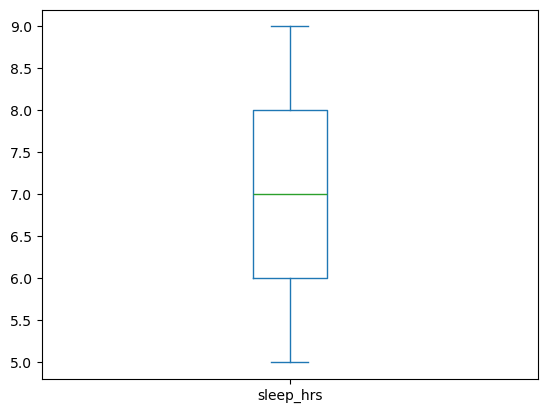

In [8]:
df['sleep_hrs'].plot(kind='box')
%matplotlib inline 
plt.show()

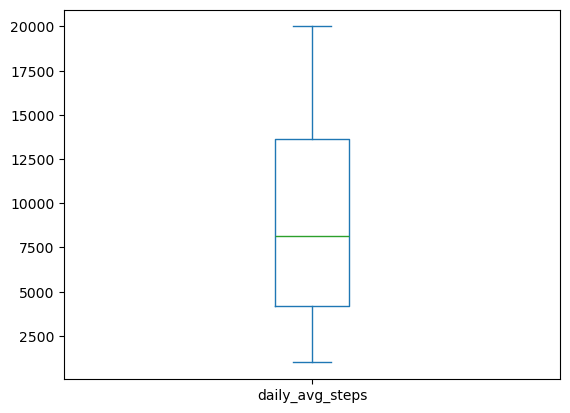

In [9]:
df['daily_avg_steps'].plot(kind='box')
%matplotlib inline 
plt.show()

In [10]:
df.describe()

,phy_fitness,sleep_hrs,mindfulness,gender,daily_avg_steps,daily_avg_calories,is_healthy
count,5964.000000,5964.000000,5964.000000,5964.000000,5964.000000,5964.000000,5964.000000
mean,5.443159,7.009557,5.572938,0.506372,9039.613682,2390.970322,0.315728
std,2.889424,1.414359,2.876964,0.500001,5527.178661,639.237211,0.464844
min,1.000000,5.000000,1.000000,0.000000,1001.000000,1500.000000,0.000000
25%,3.000000,6.000000,3.000000,0.000000,4177.750000,1889.000000,0.000000
50%,5.000000,7.000000,6.000000,1.000000,8167.500000,2244.000000,0.000000
75%,8.000000,8.000000,8.000000,1.000000,13607.500000,2796.500000,1.000000
max,10.000000,9.000000,10.000000,1.000000,20000.000000,4193.000000,1.000000


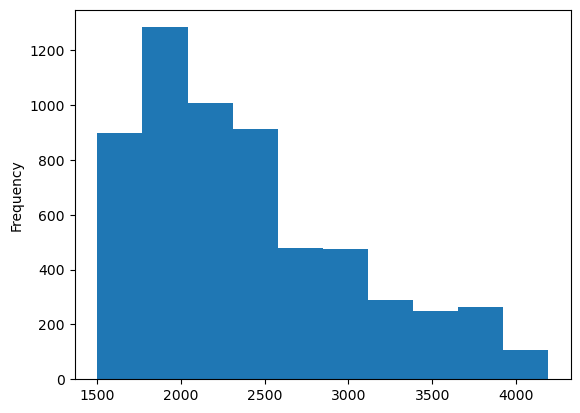

In [11]:
df['daily_avg_calories'].plot(kind='hist')
%matplotlib inline 
plt.show()

In [12]:
df['is_healthy'].value_counts()

is_healthy
0    4081
1    1883
Name: count, dtype: int64

Encoding categorical features

In [13]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

act_level_order = [['Sedentary', 'Lightly Active', 'Highly Active', 'Active']]
ord_encoder = OrdinalEncoder(categories=act_level_order)
df['act_level'] = ord_encoder.fit_transform(df[['act_level']]).astype(int)
df = pd.get_dummies(df, columns=['diet_pref', 'career'], dtype=int)

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [15]:
X= df.drop(columns=['is_healthy'])
Y= df['is_healthy']

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [17]:
from imblearn.over_sampling import SMOTE

In [18]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, Y_train)
X_train_res = pd.DataFrame(X_train_res, columns=X_train.columns)

Feature Scaling 

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

Defining Classifiers that we are using 

In [20]:
classifiers = {
    'SVM': {
        'estimator': SVC,
        'params': {'C': 10, 'kernel': 'rbf', 'gamma': 'scale'},
    },
    'Random Forest': {
        'estimator': RandomForestClassifier,
        'params': {'n_estimators': 200, 'max_depth': 10, 'random_state': 42},
    },
    'Gradient Boosting': {
        'estimator': GradientBoostingClassifier,
        'params': {'n_estimators': 200, 'learning_rate': 0.05, 'max_depth': 5},
    },
}


HyperParameters

In [21]:
param_grids = {
    'SVM': {
        'C': [1, 10, 100],
        'kernel': ['rbf'],
        'gamma': ['scale', 'auto'],
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [5, 10, 20],
        'min_samples_split': [2, 5, 10],
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
    },
}


In [23]:
def tune_classifiers(X_train, y_train):
    tuned_results = {}
    
    for name, clf_info in classifiers.items():
        print(f"\nTuning {name}...")
        estimator = clf_info['estimator']
        param_grid = param_grids.get(name, {})
        
        grid_search = GridSearchCV(estimator(), param_grid, cv=3, n_jobs=-1, verbose=2)
        grid_search.fit(X_train, y_train)
        
        tuned_results[name] = {
            'best_params': grid_search.best_params_,
            'best_score': grid_search.best_score_,
            'best_estimator': grid_search.best_estimator_,
        }
        print(f"Best parameters for {name}: {grid_search.best_params_}")
        print(f"Best CV Score for {name}: {grid_search.best_score_:.4f}")
    
    return tuned_results

Testing models after tuning

In [24]:
def test_classifiers(X_train, y_train, X_test, y_test, tuned_results):
    results = {}
    
    for name, result in tuned_results.items():
        print(f"\nEvaluating tuned {name}...")
        best_clf = result['best_estimator']
        y_pred = best_clf.predict(X_test)
        
        acc = accuracy_score(y_test, y_pred)
        results[name] = acc
        print(f"{name} Accuracy: {acc:.4f}")
    
    return results

tuned_results = tune_classifiers(X_train_scaled, y_train_res)

results = test_classifiers(X_train_scaled, y_train_res, X_test_scaled, Y_test, tuned_results)


Tuning SVM...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best CV Score for SVM: 0.9727

Tuning Random Forest...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}
Best CV Score for Random Forest: 0.9716

Tuning Gradient Boosting...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Best CV Score for Gradient Boosting: 0.9841

Evaluating tuned SVM...
SVM Accuracy: 0.9757

Evaluating tuned Random Forest...
Random Forest Accuracy: 0.9707

Evaluating tuned Gradient Boosting...
Gradient Boosting Accuracy: 0.9899


In [25]:
print("\nFinal Results after Tuning:")
for clf_name, acc in results.items():
    print(f"{clf_name}: {acc:.4f}")


Final Results after Tuning:
SVM: 0.9757
Random Forest: 0.9707
Gradient Boosting: 0.9899


Taking the best model

In [26]:
best_model_name = max(results, key=results.get)
best_accuracy = results[best_model_name]
print(f"\nBest classifier: {best_model_name} with accuracy {best_accuracy:.4f}")

best_clf_info = tuned_results[best_model_name]
best_clf = best_clf_info['best_estimator']



Best classifier: Gradient Boosting with accuracy 0.9899


Ploting Decsion boundry with phy_fitness and mindfulness

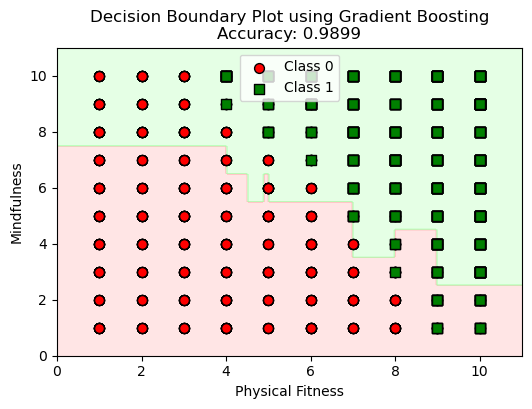

In [29]:

def plot_decision_boundary(best_clf, scaler, X_train_res, X_test, y_test, best_model_name, accuracy):
    
    if 'phy_fitness' not in X_test.columns or 'mindfulness' not in X_test.columns:
        raise ValueError("Columns 'phy_fitness' and/or 'mindfulness' not found in the dataset.")
    
    # Set up the meshgrid 
    x_min = X_test['phy_fitness'].min() - 1
    x_max = X_test['phy_fitness'].max() + 1
    y_min = X_test['mindfulness'].min() - 1
    y_max = X_test['mindfulness'].max() + 1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    feature_means = X_train_res.mean()
    
    grid_points = pd.DataFrame(np.tile(feature_means.values, (xx.ravel().shape[0], 1)),
                               columns=X_train_res.columns)
    grid_points['phy_fitness'] = xx.ravel()
    grid_points['mindfulness'] = yy.ravel()
    
    grid_points_scaled = scaler.transform(grid_points)

    Z = best_clf.predict(grid_points_scaled)
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(6, 4))
    
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    
    for label, marker, color in zip(np.unique(y_test), ('o', 's'), ('red', 'green')):
        idx = (y_test == label)
        plt.scatter(X_test.loc[idx, 'phy_fitness'],
                    X_test.loc[idx, 'mindfulness'],
                    c=color, marker=marker, label=f"Class {label}",
                    edgecolor='k', s=50)
    
    plt.xlabel('Physical Fitness')
    plt.ylabel('Mindfulness')
    plt.title(f"Decision Boundary Plot using {best_model_name}\nAccuracy: {accuracy:.4f}")
    plt.legend()
    plt.show()

plot_decision_boundary(best_clf, scaler, X_train_res, X_test, Y_test, best_model_name, best_accuracy)


Evaluating using more metrics

In [28]:
from sklearn.metrics import classification_report

def test_classifiers(X_train, y_train, X_test, Y_test, tuned_results):
    results = {}
    
    for name, result in tuned_results.items():
        print(f"\nEvaluating tuned {name}...")
        best_clf = result['best_estimator']
        Y_pred = best_clf.predict(X_test)

        acc = accuracy_score(Y_test, Y_pred)
        report = classification_report(Y_test, Y_pred, digits=4)
        
        results[name] = {
            "accuracy": acc,
            "classification_report": report
        }
        
        print(f"{name} Accuracy: {acc:.4f}")
        print(f"Classification Report for {name}:\n{report}")
    
    return results

results = test_classifiers(X_train_scaled, y_train_res, X_test_scaled, Y_test, tuned_results)



Evaluating tuned SVM...
SVM Accuracy: 0.9757
Classification Report for SVM:
              precision    recall  f1-score   support

           0     0.9833    0.9821    0.9827       840
           1     0.9576    0.9603    0.9590       353

    accuracy                         0.9757      1193
   macro avg     0.9705    0.9712    0.9709      1193
weighted avg     0.9757    0.9757    0.9757      1193


Evaluating tuned Random Forest...
Random Forest Accuracy: 0.9707
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0     0.9867    0.9714    0.9790       840
           1     0.9344    0.9688    0.9513       353

    accuracy                         0.9707      1193
   macro avg     0.9606    0.9701    0.9652      1193
weighted avg     0.9712    0.9707    0.9708      1193


Evaluating tuned Gradient Boosting...
Gradient Boosting Accuracy: 0.9899
Classification Report for Gradient Boosting:
              precision    recall  f1-score

In [31]:
import joblib

joblib.dump(best_model_name, "gradient_boosting_model.pkl")
print("Model saved successfully!")

Model saved successfully!
